## Assignment 4:CNN with Applications
### Adithya Jayan - 181EC102 | Anvith M - 181EC105

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tqdm.notebook as tqdm

##### Q.1.
- (i) Write python code for plotting the following activation functions and their derivative for the input x in the range of -20 to 20. 
    - (a) ReLU 
    - (b) LekayReLU 
    - (c) Parametric ReLU 
    - (d) Exponential ReLU(ELU) 
    - (e) Scaled Exponential Linear Units (SELU) 
    - (f) SoftPlus (Smooth ReLU) 

In [81]:
##Defining required functions for part 1.(i)

def plot_relu(Input,plot=1):
    output = Input.copy()
    output[output<0] = 0
    
    derivative = np.ones_like(Input)
    derivative[Input<0] = 0
        
    if(plot):
        plt.figure()
        plt.title("ReLU plot")
        plt.plot(Input,output)
        
        plt.figure()
        plt.title("ReLU derivative plot")
        plt.plot(Input,derivative)
    return(output)

def plot_leaky_relu(Input,plot=1):
    output = Input.copy()
    derivative = np.ones_like(Input)
    for i in range(len(Input)):
        if(Input[i]<0): 
            output[i]=Input[i]*0.01
            derivative[i] = 0.01
    if(plot):
        plt.figure()
        plt.title("Leaky ReLU plot")
        plt.plot(Input,output)
        
        plt.figure()
        plt.title("Leaky ReLU derivative plot")
        plt.plot(Input,derivative)
    return(output)

def plot_Parametric_relu(Input,alpha,plot=1):
    output = Input.copy()
    derivative = np.ones_like(Input)
    for i in range(len(Input)):
        if(Input[i]<0): 
            output[i]=Input[i]*alpha
            derivative[i] = alpha
    if(plot):
        plt.figure()
        plt.title("Parametric ReLU plot")
        plt.plot(Input,output)
        
        plt.figure()
        plt.title("Parametric ReLU derivative plot")
        plt.plot(Input,derivative)
    return(output)

def plot_Exponential_relu(Input,alpha,plot=1):
    output = Input.copy()
    derivative = np.ones_like(Input)
    for i in range(len(Input)):
        if(Input[i]<0): 
            output[i]=(np.exp(Input[i])-1)*alpha
            derivative[i] = output[i] + alpha
    if(plot):
        plt.figure()
        plt.title("ELU plot")
        plt.plot(Input,output)
        
        plt.figure()
        plt.title("ELU derivative plot")
        plt.plot(Input,derivative)
    return(output)

def plot_Scaled_Exponential_relu(Input,alpha,lamda,plot=1):
    output = Input.copy()
    derivative = np.ones_like(Input)
    for i in range(len(Input)):
        if(Input[i]<0): 
            output[i]=(np.exp(Input[i])-1)*alpha
            derivative[i] = (np.exp(Input[i]))*alpha
    output = output*lamda
    if(plot):
        plt.figure()
        plt.title("Scaled ELU plot")
        plt.plot(Input,output)
        
        plt.figure()
        plt.title("Scaled ELU derivative plot")
        plt.plot(Input,derivative)
    return(output)

def plot_Smooth_relu(Input,plot=1):
    output = np.log(1+np.exp(Input))
    derivative = 1/(1+np.exp(-1*Input))
    if(plot):
        plt.figure()
        plt.title("SoftPlus plot")
        plt.plot(Input,output)
        
        plt.figure()
        plt.title("SoftPlus derivative plot")
        plt.plot(Input,derivative)
    return(output)

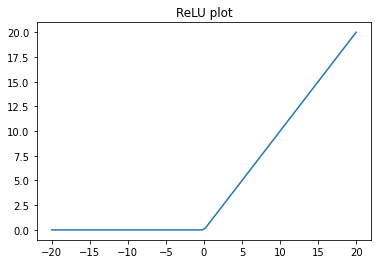

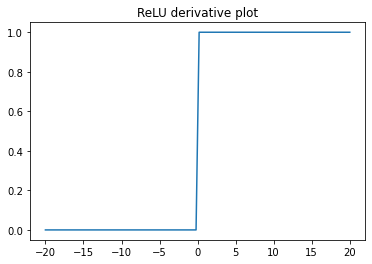

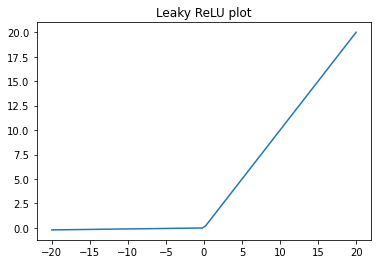

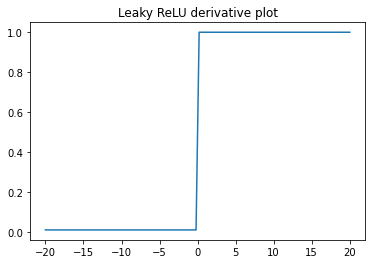

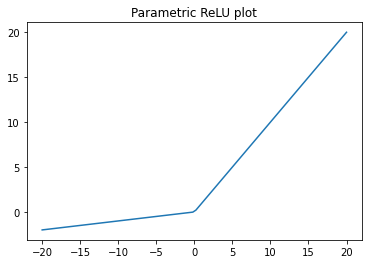

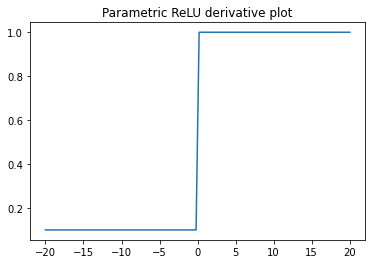

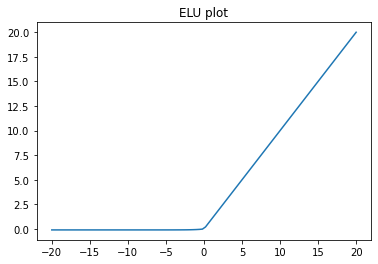

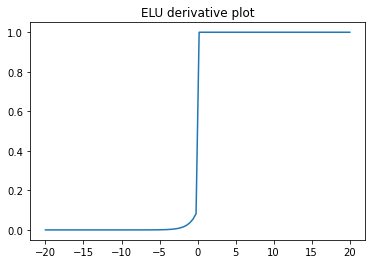

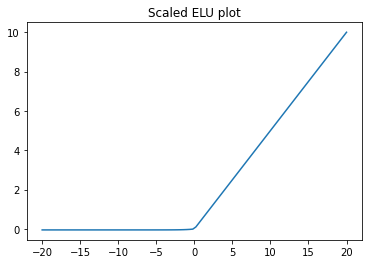

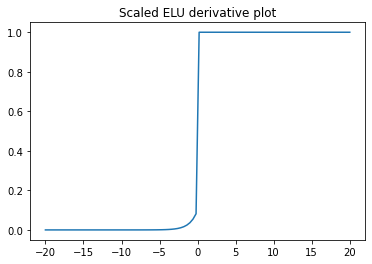

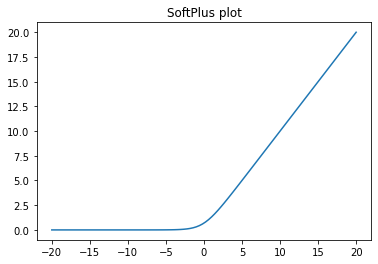

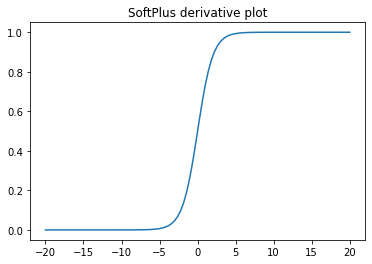

In [82]:
#Solution for 1.(i)

#Defining Input range
Input = np.linspace(-20,20,100)

#Defining required parameters
alpha = 0.1
lamda = 0.5

#Calculation and plotting via function call
plot_relu(Input,plot=1);
plot_leaky_relu(Input,plot=1);
plot_Parametric_relu(Input,alpha,plot=1);
plot_Exponential_relu(Input,alpha,plot=1);
plot_Scaled_Exponential_relu(Input,alpha,lamda,plot=1);
plot_Smooth_relu(Input,plot=1);

##### Q1.
- (ii)
    - (a).Write python from scratch for 2D Linear convolution between input=np.array([[1,2,3],[4,5,6],[7,8,9]])and filter=np.array([[1,2,1],[0,0,0],[-1,-2,-1]]) 
    - (b).Write python from scratch for 2D Linear convolution by Toeplitz matrix method between input image(lena.jpg) and kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]]))/16 
    - (c) Compute number of multiplications and parameters required for 2D Linear Convolution in part (a) and part(b) 
    - (d) Apply Max pooling and Average pooling on convoled image in part (b) 

In [83]:
#Functions for part 1.(ii).(a)

def convolve(Image,kernel,padding = (0,0),s = 1):
    
    kernel = np.flipud(np.fliplr(kernel))
    p1,p2 = padding
    
    x,y = Image.shape

    x_k,y_k = kernel.shape

    out_x = (x-x_k+2*p1)//s+1
    out_y = (y-y_k+2*p2)//s+1
    
    out = np.zeros((out_x,out_y))
    
    Img_padded = np.zeros((x+2*p1,y+2*p2))
    Img_padded[p1:p1+x,p2:p2+y] = Image
    Image = Img_padded
    
    for i in range(out_x):
        i_img = i*s
        for j in range(out_y):
            j_img = j*s
            out[i,j] = np.sum(Image[i_img:i_img+x_k,j_img:j_img+y_k]*kernel)
            
    print("Convolution:\n",out)
    print("\nTotal number of multiplications is: ",(out_x*out_y*x_k*y_k))
    
    return out

In [84]:
#Solution for part 1.(ii).(a)

Image = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("Image:\n",Image)

kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
print("Kernel:\n",kernel)

convolved = convolve(Image,kernel,(1,1))


Image:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Kernel:
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]
Convolution:
 [[ 13.  20.  17.]
 [ 18.  24.  18.]
 [-13. -20. -17.]]

Total number of multiplications is:  81


In [85]:
#Functions for part 1.(ii).(b) and 1.(ii).(c)
def rightrotate(arr):
    l = len(arr)
    y = arr[l-1]
    for n in range(l-1,-1,-1):
        arr[n] = arr[n-1]
    arr[n] = y
    return arr

def convolve2dmatrix(input,kernel):
    r1 = np.shape(input)[0]
    c1 = np.shape(input)[1]
    r2 = np.shape(kernel)[0]
    c2 = np.shape(kernel)[1]

    #dimensions of output
    r3 = r1+r2-1
    c3 = c1+c1-1

    #zero padding kernel
    kernel = np.pad(kernel,((0,r3-r2),(0,c3-c2)), 'constant')

    #Creating toeplitz submatrices
    mylist = []
    for i in range(r3):
        x = kernel[i]
        for j in range(c1):
            if (j==0):
                temp = np.array([x])
            else:
                x = rightrotate(x)
                temp = np.vstack((temp,x))
        mylist.append(temp)
  
    #Creating the Blocked Toeplitz matrix
    #soft coded for general case
    templist = mylist
    length = len(templist)
    for j in tqdm.tqdm(range(c1),leave=False,desc = "Convolution progress"):
        if (j==0):
            for k in range(length):
                if (k==0):
                    H = np.block([templist[0]])
                else:
                    H = np.block([H,templist[k]])
            Hfinal = np.block(H)
        else:
            templist = rightrotate(templist)
            for k in range(length):
                if (k==0):
                    H = np.block([templist[0]])
                else:
                    H = np.block([H,templist[k]])
            Hfinal = np.block([[Hfinal],[H]])
    Hfinal = np.transpose(Hfinal)

    #reshape input matrix
    input = np.reshape(input,r1*c1)

    #multiply both
    result_vector = np.matmul(Hfinal, input)

    #reshape output vector
    result_vector = np.reshape(result_vector,(r3,c3))
    
    crop = result_vector[0:102, 0:102]
    plt.imshow(crop,cmap='gray')
    plt.title("Convolved Image:")
    plt.show()
    print("")
    
    return crop
    
def computemultiplications(img,kernel):
    Dfr = np.shape(img)[0]
    Dfc = np.shape(img)[1]
    Dkr = np.shape(kernel)[0]
    Dkc = np.shape(kernel)[1]

    #dimensions of output
    Dpr = Dfr+Dkr-1
    Dpc = Dfc+Dkc-1

    total = (Dkr**2)*(Dpr**2)
    return total

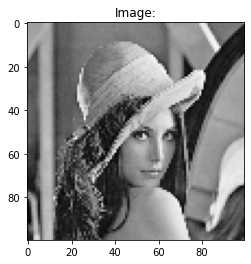

Kernel:
 [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]



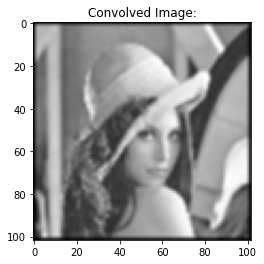


The total number of multiplications are: 93636


In [86]:
#Solution for part 1.(ii).(b) and 1.(ii).(c)

input2 = cv2.imread('lena.tif',0)
input2 = cv2.resize(input2,(100,100))
kernel2 = np.array([[1,2,1],[2,4,2],[1,2,1]])
kernel2 = kernel2/16

plt.imshow(input2,cmap='gray')
plt.title("Image:")
plt.show()
print("Kernel:\n",kernel2)
print("")

#Converting image to numpy array
input2 = np.array(input2)

#Calling Convolve2dmatrix
convolved = convolve2dmatrix(input2,kernel2)

#Compute Multiplications
print("The total number of multiplications are:",computemultiplications(input2,kernel2))

In [8]:
#Functions for part 1.(ii).(d)

def Max_pooling(Image,kernel_size):
    
    x,y = Image.shape

    x_k,y_k = kernel_size

    out_x = (x-x_k)+1
    out_y = (y-y_k)+1
    
    out = np.zeros((out_x,out_y))
        
    for i in range(out_x):
        for j in range(out_y):
            out[i,j] = np.max(Image[i:i+x_k,j:j+y_k])
            
    plt.imshow(out,cmap='gray')
    plt.title("Max_pooled Image:")
    plt.show()        
    
#Functions for part (d)

def Average_pooling(Image,kernel_size):
    
    x,y = Image.shape

    x_k,y_k = kernel_size

    out_x = (x-x_k)+1
    out_y = (y-y_k)+1
    
    out = np.zeros((out_x,out_y))
        
    for i in range(out_x):
        for j in range(out_y):
            out[i,j] = np.mean(Image[i:i+x_k,j:j+y_k])
            
    plt.imshow(out,cmap='gray')
    plt.title("Average_pooled Image:")
    plt.show()     

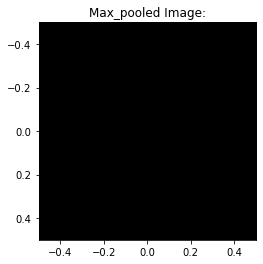

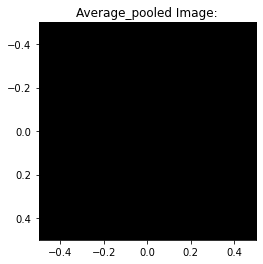

In [9]:
#Solution for part 1.(ii).(d)

Max_pooling(convolved,(3,3))
Average_pooling(convolved,(3,3))

##### Q1.
- (iii) 
    - (a)Write python from scratch for 2D Spatial Separbale convolution between input image(lena.jpg) and Gausian filter = np.array([1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1])/256 
    - (b) Compute number of multiplications and parameters required for2D Spatial Separbale convolution 

    
##### Q. 2. Build a CNN(LeNet5) model from scratch to recognize handwritten digit from the optical handwritten digit dataset(Use Sklearn Dataset and split dataset into training dataset (80%) and testing dataset (20%) ). Use a Stochastic gradient descent algorithm to learn model with parameters for α = 0.01 and random parameters of the CNN model for 
- (a) Softmax loss function 
- (b) Focal loss function.
    - (i) Plot a comparative loss curve for at least 200 epochs. 
    - (ii) Print confusion matrix, calculate classification metrics such as precision, recall, f1-score and accuracy on test datset and ROC curve for each loss function. 
    - (iii) Repeat part (i) to (ii) using an Adam gradient descent algorithm 
    - (iv) Implement above CNN model with Keras/Tensorflow/Pytorch Library and verify the above results. 

In [38]:
#Function for debugging
def check_nan(Layer_name,**variables):
    if any(np.isnan(val).any() for val in variables.values()):
        print("************* nan detected at {}! *************\n".format(layer_name))
        for key,value in variables.items():
            print("Variable ",key,":")
            print(value,"\n")

## Required layers

# Conv2D
class conv2d_layer:
    def __init__(self,shape,n,anything_else = None):
        self.w = np.random.rand(n,shape[0],shape[1],shape[2])/(np.product(shape)+1)
        self.b = np.random.rand(n)/(np.product(shape)+1)
        self.n = n
        
    def forward(self,Image):    
        
        if(len(Image.shape)==2):
            Image=np.reshape(Image,(1,Image.shape[0],Image.shape[1]))
            
        x,y = Image[0].shape

        _ , x_k , y_k = self.w[0].shape

        out_x = x-x_k+1
        out_y = y-y_k+1
        
        output = []
        
        for pos in range(self.n):
            out = np.zeros((out_x,out_y))
            
            for i in range(out_x):
                for j in range(out_y):
                    out[i,j] = np.sum(Image[:,i:i+x_k,j:j+y_k]*self.w[pos]) + self.b[pos]
            output = output + [out]
        output = np.array(output)      
            
#         check_nan(Layer_name = "conv2d_layer forward step",
#                   output = output,
#                   Image = Image,
#                   self_Weight = self.w,
#                   self_Bias = self.b)
        
        return output
    
    def reverse(self,Image,Errors):
        
        if(len(Image.shape)==2):
            Image=np.reshape(Image,(1,Image.shape[0],Image.shape[1]))
            
        x,y = Image[0].shape
        _ ,x_k,y_k = self.w[0].shape
        err_x,err_y = Errors[0].shape
        
        output = np.zeros_like(Image,Errors.dtype)
        for layer in range(self.n):
            for i in range(err_x):
                for j in range(err_y):
                    output[:,i:i+x_k,j:j+y_k] += Errors[layer,i,j]*self.w[layer]
                    self.w[layer] = self.w[layer] - Errors[layer,i,j]*Image[:,i:i+x_k,j:j+y_k]
                    self.b[layer] = self.b[layer] - Errors[layer,i,j]
                
#         check_nan(Layer_name = "conv2d_layer reverse step",
#                   output = output,
#                   Image = Image,
#                   Errors = Errors,
#                   Weights = self.w,
#                   Bias = self.b)
        
        return output
    
    def display(self):
        print("\n**********Convolution Parameters**********")
        print("Weights are:\n", self.w)
        print("Bias is:\n ", self.b)
        print("#Kernels is:\n ", self.n)
        
# tanh
class tanh:
    
    def forward(self,Input):
        exp = np.exp(-2*Input)
        output = (1-exp)/(1+exp)
        
#         check_nan(Layer_name = "tanh forward step",
#           Input = Input,
#           output = output)
            
        return output
    
    def reverse(self,Input,Errors):
        der = 1-np.square(self.forward(Input))
        output = der*Errors
        
#         check_nan(Layer_name = "tanh reverse step",
#                   Input = Input,
#                   Errors = Errors,
#                   output = output,
#                   der = der)
        
        return output
    
# AveragePooling2D
class AveragePooling2D:
    
    def __init__(self,shape,stride,anything_else = None):
        self.shape = shape
        self.stride = stride
        
    def forward(self,Image):  
        if(len(Image.shape)==2):
            Image=np.reshape(Image,(1,Image.shape[0],Image.shape[1]))
            
        x,y = Image[0].shape
        s=self.stride
        x_k,y_k = self.shape
        
        out_x = (x-x_k)//s+1
        out_y = (y-y_k)//s+1

        output = []
        for pos in range(Image.shape[0]):
            
            out = np.zeros((out_x,out_y))

            for i in range(out_x):
                for j in range(out_y):
                    out[i,j] = np.mean(Image[0][i*s:i*s+x_k,j*s:j*s+y_k])
            output = output + [out]
            
        output = np.array(output)
        
        return output
    
    def reverse(self,Image,Errors):
        if(len(Image.shape)==2):
            Image=np.reshape(Image,(1,Image.shape[0],Image.shape[1]))
        
        x,y = Image[0].shape
        x_k,y_k = self.shape
        err_x,err_y = Errors[0].shape
            
        output = []
        for pos in range(Image.shape[0]):

            out = np.zeros_like(Image[pos],Errors.dtype)

            for i in range(err_x):
                for j in range(err_y):
                    out[i:i+x_k,j:j+y_k] += Errors[pos,i,j]/(x_k*y_k)
            output = output + [out]
        output = np.array(output)
        return output
    
# Flatten
class flatten():
    
    def forward(self,Image):
        output = np.reshape(Image,np.product(Image.shape))
        return output
    
    def reverse(self,Image,errors):
        output = np.reshape(errors,Image.shape)
        return output

# Dense
class fully_connected():
    def __init__(self,input_size,n):
        
        self.w = np.random.rand(n,input_size)/(input_size+1)
        self.b = np.random.rand(n)/(input_size+1)
        self.n = n
    
    def forward(self,Input):
        output = []
        for layer in range(self.n):
            out = np.dot(Input,self.w[layer]) + self.b[layer]
            output = output + [out]
        output = np.array(output)
        return output
    
    def reverse(self,Input,errors):
        
        output = np.zeros_like(Input)
        for layer in range(self.n):
            self.w[layer] = self.w[layer] - errors[layer]*Input
            self.b[layer] = self.b[layer] - errors[layer]
            output = output + errors[layer]*self.w[layer]   
        output = np.array(output)
        return output
    
# softmax
class softmax():
    
    def forward(self,Input):

        Numerator = np.exp(Input)
        output = Numerator/sum(Numerator)
        
        return (output)
    
    def reverse(self,Input,errors):
            
        Soft = self.forward(Input)
        derivative = Soft*(np.identity(len(Input)) - np.transpose(Soft))
        output = np.matmul(errors,derivative)
        
        return output

def SoftmaxLoss(truth,predicted):
    
    loss = -1* np.sum(truth*np.log(predicted))
    
    Numerator = np.exp(predicted)
    softmax = Numerator/sum(Numerator)
        
    grad = softmax
    grad[truth == 1] = softmax[truth == 1] - 1
    
    return (loss,grad)
# Must work for both adam as well as SGD algos

In [39]:
A = np.array([1,0.2])
B = np.array([0.01,0.5])
CrossEntropyLoss(A,B)
A/B

array([100. ,   0.4])

In [51]:
temp =  conv2d_layer((2,5,5),2)
Img = np.array([
    [
    [1,2,3,3,2],
    [1,3,5,2,3],
    [2,5,3,1,2],
    [3,1,2,1,2],
    [5,2,4,3,1]],
    [
    [1,2,3,3,2],
    [1,3,5,2,3],
    [2,5,3,1,2],
    [3,1,2,1,2],
    [5,2,4,3,1]]
])

temp.forward(Img)

array([[[0.97908197]],

       [[1.07660811]]])

In [76]:
Model = [] #Input = 1*32*32

#Layer 0
Model = Model + [conv2d_layer((1,5,5),6)] #Out = 6*28*28

#Layer 1
Model = Model + [tanh()] #Out = 6*28*28

#Layer 2
Model = Model + [AveragePooling2D((2,2),2)] # Out = 6*14*14

#Layer 3
Model = Model + [conv2d_layer((6,5,5),16)] #Out = 16*10*10

#Layer 4
Model = Model + [tanh()] #Out = 16*10*10

#Layer 5
Model = Model + [AveragePooling2D((2,2),2)]# Out = 16*5*5

#Layer 6
Model = Model + [conv2d_layer((16,5,5),120)] #Out = 120*1*1

#Layer 7
Model = Model + [tanh()] #Out = 120*1*1

#Layer 8
Model = Model + [flatten()] #Out = 120

#Layer 9
Model = Model + [fully_connected(120,84)] #Out = 84

#Layer 10
Model = Model + [tanh()] #Out = 84

#Layer 11
Model = Model + [fully_connected(84,10)] #Out = 10

#Layer 12
Model = Model + [softmax()] #Out = 10

In [77]:
### Read dataset
from sklearn.datasets import load_digits
data = load_digits()
list(data.target_names)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [78]:
from sklearn.model_selection import train_test_split
x = data['images']/16
y = data['target']
col_names = data['target_names']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size =0.2)

In [79]:
epochs = 5
Recorded_loss = []
Learning_rate = 0.1

for ep in range(epochs):
    
    Data = tqdm.tqdm(zip(x_train,y_train),total = len(y_train),leave=True,desc = "Images")
    
    for Input_img,truth in Data:
        
        truth_onehot = np.array([0]*10)
        truth_onehot[truth] = 1
        
        outputs = [cv2.resize(Input_img,(32,32))]

        for i in range(13):
            out = Model[i].forward(outputs[-1])
#             print(i,out.shape)
#             print(out)
            outputs += [out.copy()]
            
    
        Loss, error = SoftmaxLoss(truth_onehot,outputs[-1])
#         print(Loss,error)
        error = error * Learning_rate
        Recorded_loss += [Loss] 
        
        Data.set_description("Current loss is: {}".format(np.round(Loss,5)))
        Data.refresh()
        
#         print("\n\nTruth:\n",truth_onehot,"\nPrediction:\n",outputs[-1])
#         print("Epoch: ",ep ,"\nLoss:",Loss)
        
        error = [error]
        for i in range(12,-1,-1):
#             print("Reversing layer {}.".format(i))
            out = Model[i].reverse(outputs[i],error[-1])
            error += [out.copy()]
            
        error.reverse()
#         for i,layer in enumerate(error): 
#             print("\n*******************Output of layer {} is:*******************\n\n".format(i-1),outputs[i])
#             print("\n*******************Error in layer {} output:*******************\n\n".format(i-1),layer)
    
Data.set_description("Completed")
Data.refresh()

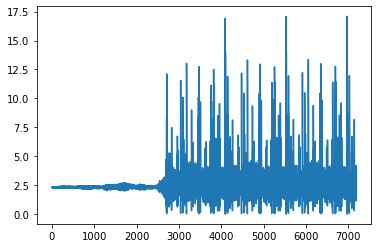

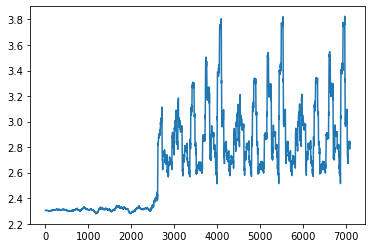

In [80]:
plt.plot(Recorded_loss)
val = 100
Avg_loss = []
for i in range(len(Recorded_loss)-val):
    Avg_loss +=  [np.mean(Recorded_loss[i:i+val])]

plt.figure()
plt.plot(Avg_loss)

##### Q.3. Build CNN(LeNet5) model from scratch to recognize diabetes-fromPima-Indians-diabetesdatabase (i.e. https://github.com/duonghuuphuc/keras/tree/master/dataset ). Use Adamgradient descent algorithm to learn model with parameters for α = 0.01 and random parameters of theCNN model for Binary cross entropy loss function. 
- (i) Visualize input dataset and Plot comparative loss curve for at least 200 epochs. 
- (ii) Print confusion matrix, calculate classification metrics such as precision, recall, f1-score and accuracy on test datsetand ROC curve for each loss function. 
- (iii) Implement above CNN model with Keras/Tensorflow/Pytorch Library and verify the above results.

##### Q. 4. Build a CNNmodel from scratch to recognize human emotion using Facial emotionrecognition dataset (FER2013) (https://github.com/gitshanks/fer2013)(split dataset into training dataset (80%) and testing dataset (20%) ). For implementation, use a Adam gradient descent algorithm to learn model with parameters for α = 0.01 and random parameters of the CNN model forthe Softmax loss function 
- (i)Visualize Facial emotion recognition dataset (FER2013). 
- (ii) Plot a comparative loss curve for at least 200 epochs. 
- (iii)Print confusion matrix, calculate classification metrics such as precision, recall, f1-score and accuracy on test dataset and ROC curve 
- (iv) Implement above CNN model withKeras/Tensorflow/Pytorch Library and verify the above results.